# Waveform whitening

We will filter the signal (Newtonian Chirp) with the interferometer response function, that is the sensitivity curve. In order, we will: 

* analyze deterctors sensitivity curves
* perform discrete Fourier transform on the signal
* filter the signal with the interferometer response function
* perform an inverse Fourier transform on the signal to visualize the true detector output

## Sensitivity curves

A sensitivity curve tells us how sensitive the detector is at a giver frequency. To represent the deterctor sensitivity, we will use ASD (amplitude spectral density), that is the square root of PSD (power spectral density), that tells us the average amount of noise squared.

We will examine the sensitivity curves of LIGO and Virgo detectors based on first three months of O3a run (from april to june 2019):

* LIGO Hanford detector (H1) 
* LIGO Livingston detector (L1) 
* Virgo detector (V)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

In [2]:
# import data

path = './SensitivityData/'

L1_O3 = np.loadtxt(path + 'L1_O3.txt')
f_L3, s_L3 = L1_O3.T

H1_O3 = np.loadtxt(path + 'H1_O3.txt')
f_H3, s_H3 = H1_O3.T

V_O3 = np.loadtxt(path + 'Virgo_O3.txt')
f_V3, s_V3 = V_O3.T

In [3]:
# print max frequency
print(f_L3[-1])
print(f_V3[-1])

5000.0
10000.0


### Plot sensitivity curves

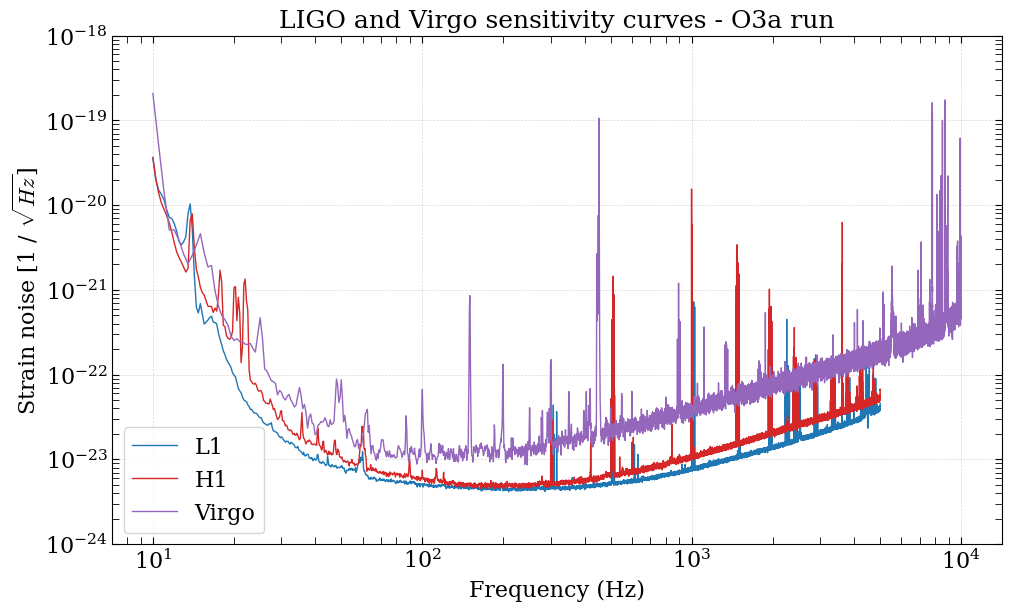

In [4]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.loglog(f_L3, s_L3, color='tab:blue', linewidth=1, label='L1')
ax.loglog(f_H3, s_H3, color='tab:red', linewidth=1, label='H1')
ax.loglog(f_V3, s_V3, color='tab:purple', linewidth=1, label='Virgo')

# labels
ax.set_xlabel('Frequency (Hz)', fontdict={'fontfamily':'serif', 'fontsize':16})
ax.set_ylabel('Strain noise [1 / $\sqrt{Hz}$]', fontdict={'fontfamily':'serif', 'fontsize':16})

ax.set_title('LIGO and Virgo sensitivity curves - O3a run', fontdict={'fontfamily':'serif', 'fontsize':18})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# axis limits
# ax.set_xlim(8, 6*10**(3))
ax.set_ylim(10**(-24), 10**(-18))

# legend
ax.legend(prop={'size' : 16}, loc='best')

plt.show()

## Discrete Fourier transform of the signal

### Signal (Newtonian Chirp with GW150914 parameters)

In [5]:
import astropy.constants as const

In [6]:
# constants 
G   = const.G.value     # N m^2/kg^2
M_S = const.M_sun.value # kg
C   = const.c.value     # m/s

In [7]:
# chirp parameters
m1_sm = 36                        # compact object 1 mass (units of solar masses)
m2_sm = 29                        # compact object 2 mass (units of solar masses)
m1    = m1_sm * M_S               # compact object 1 mass (kg)
m2    = m2_sm * M_S               # compact object 2 mass (kg)
m     = m1 + m2                   # total mass
t_0   = 0                         # time of coalescence (s)
d_pc  = 410 * 10**6               # distance (pc)
d     = d_pc * 3.086 * 10**(16)   # distance (m)

# chirp mass (solar masses)
m_c = pow(m1_sm*m2_sm, 3/5) * pow(m1_sm+m2_sm, -1/5) 
mc = pow(m1*m2, 3/5) * pow(m1+m2, -1/5) 

# maximum frequency in the merger (Hz)
f_0 = pow(2 * np.pi * np.sqrt(2), -1) * pow(G * M_S / (pow(C,3)), -1) * M_S / m     

# time
time_step = 1/(2*5000)
t = np.arange(-4, 0, time_step)

# frequency
f = pow( pow(f_0, -8/3) - 256/5 * pow(np.pi, 8/3) * pow(mc / M_S, 5/3) * pow((G*M_S)/pow(C,3), 5/3) * (t-t_0), -3/8 )

# phase at coalescence (radian)
phi = np.pi / 2

a = 4*C/d * pow(G*M_S, 5/3) * pow(C, -5) * m1_sm * m2_sm * pow(m1_sm+m2_sm, -1/3)

b = pow(np.pi * f, 2/3)

norm = 1 / np.max(np.abs(a*b))

# waveform with + (plus) polarization

def strain(x):
    return a * b * np.cos(2 * np.pi * f * x + phi)

h = strain(t)

h[-1] = 0 # making sure is 0 for t = t0

print("Maximum frequency:", f_0)
print("chirp mass:", m_c)

Maximum frequency: 351.5136967007288
chirp mass: 28.09555579546043


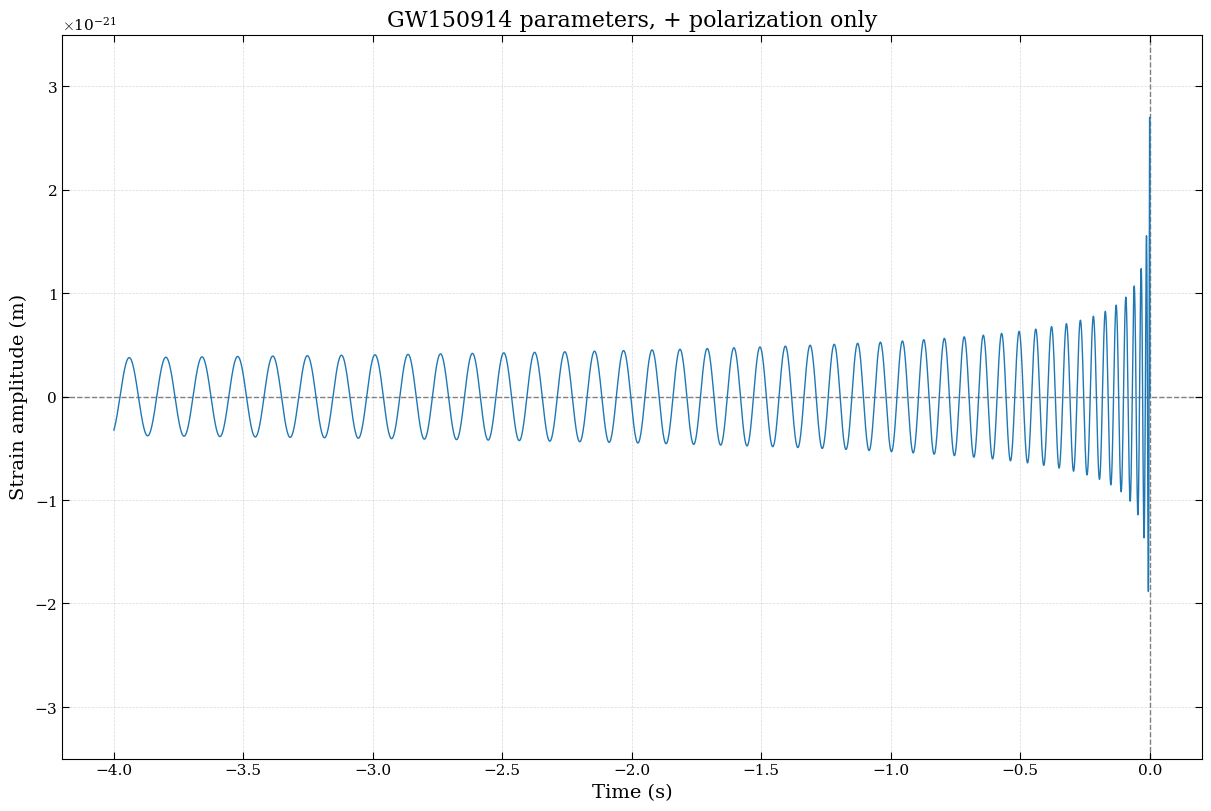

In [8]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True)

# plot
ax.plot(t, h, color='tab:blue', linewidth=1, zorder=1)

# reference lines
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)

# labels 
ax.set_xlabel('Time (s)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_ylabel('Strain amplitude (m)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_title('GW150914 parameters, + polarization only', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=11)

# axis limits
# ax.set_xlim(-0.2, 0.1)
ax.set_ylim(-3.5*10**(-21),3.5*10**(-21))

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(11)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# display 
plt.show()

### Window function

In [9]:
import scipy.fft as fft
import scipy.signal as signal

In [10]:
# window function (tapered cosine)
w = signal.windows.tukey(h.size, alpha=0.25, sym=True)

# cutting window right edge
w1 = np.where(t > -1, 1, w)

# scaling for visualization
w2 = w1 * 10**(-21)

# combining signal with window
h_w = h * w1

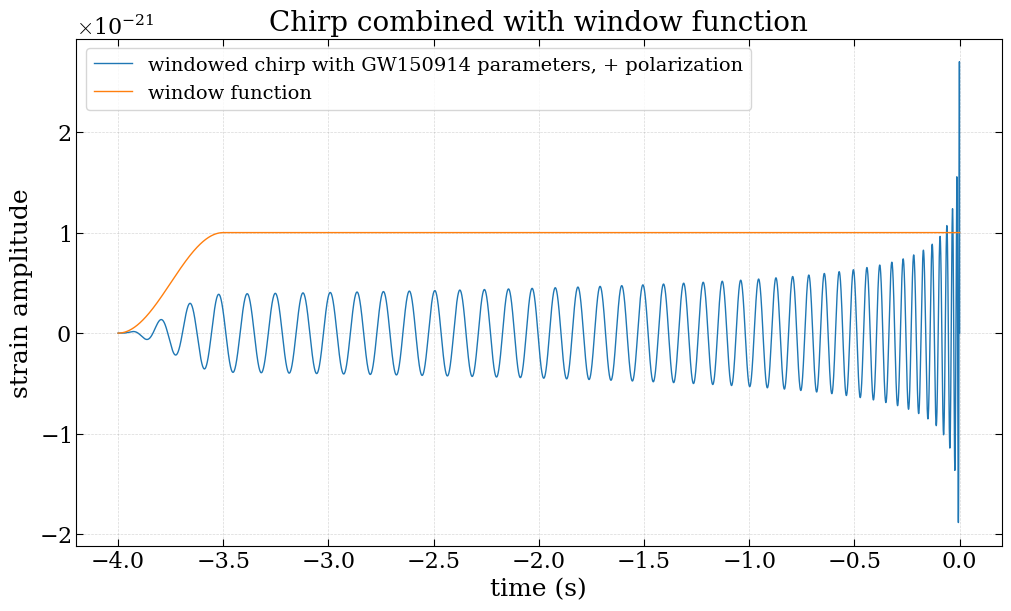

In [11]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t, h_w, color='tab:blue', linewidth=1, label='windowed chirp with GW150914 parameters, + polarization')
ax.plot(t, w2, color='tab:orange', linewidth=1, label='window function')

# labels
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('strain amplitude', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_title('Chirp combined with window function', fontdict={'fontfamily':'serif', 'fontsize':20})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(16)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# axis limits
# ax.set_xlim(-4.1, 0.1)
# ax.set_ylim(-3.5*10**(-21),3.5*10**(-21))

# legend
ax.legend(prop={'size' : 14}, loc='best')

plt.show()

### Discrete Fourier Transform

In [12]:
# experimental frequency step
efs = f_L3[1] - f_L3[0]

# real signal DFT (compute only non - negative frequency terms, faster) --> one sided, complex
h_f = fft.fft(h_w, norm="backward")

# corresponding frequencies
sample_freq = fft.fftfreq(h.size, time_step)

print("experimental frequency step (Hz):", efs)
print("Fourier frequency step (Hz):", sample_freq[1]-sample_freq[0])

max_sample_freq = np.max(sample_freq)
print(max_sample_freq)

experimental frequency step (Hz): 0.25
Fourier frequency step (Hz): 0.25
4999.75


In [13]:
# folding signal
size = int(h_f.size/2)

folded_signal = np.zeros(size)

folded_signal[0] = np.real(h_f[0])

for i in range(1, size):
    folded_signal[i] = np.real(h_f[i] + h_f[-i])

# folding frequencies

folded_frequencies = np.zeros(size)

for i in range(1, size):
    folded_frequencies[i] = (sample_freq[i] - sample_freq[-i])/2

### Signal PSD (Power Spectrum Density) 

In [14]:
# computing psd with periodogram method (boxcar window is constant): 
# it returns psd and corresponding frequencies, it requires in input the signal in time domain
psd_f, psd = signal.periodogram(h_w, fs=1/time_step, window='boxcar', nfft=None,
                                detrend=False, return_onesided=True, scaling='density')

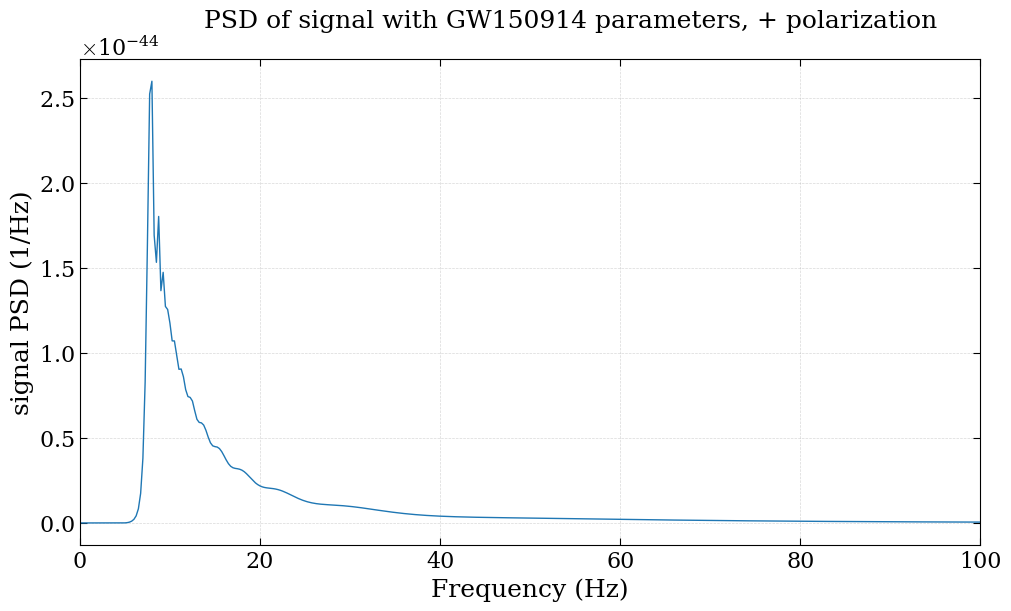

In [15]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(psd_f, psd, color='tab:blue', linewidth=1, label='Signal PSD')
# ax.set_xscale('log')

# labels
ax.set_xlabel('Frequency (Hz)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('signal PSD (1/Hz)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_title('          PSD of signal with GW150914 parameters, + polarization', fontdict={'fontfamily':'serif', 'fontsize':18})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(16)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

ax.set_xlim(0, 100)

# legend
# ax.legend(prop={'size' : 14}, loc='best')

plt.show()

## Signal filtering

In [16]:
# it is necessary to do the inverse Fourier transform of an array 
# of the same type as the one that returns the direct Fourier transform:
# we need an array of the same lenght so we have to divide the Fourier transform 
# by an array of the same lenght 

# indexes at which sample freq are equal to 10 or 5000
d = np.where( folded_frequencies == 10.0 ) 
c = np.where( folded_frequencies == max_sample_freq )

pre_ones = np.ones( d[0][0] - 1 ) * 10**(-19)
post_ones = np.ones( folded_frequencies.size - c[0][0] - 1 ) * 10**(-22)

sensitivity = np.concatenate([pre_ones, s_L3, post_ones])

fil_sig = folded_signal / (sensitivity)

In [17]:
# SNR

df = folded_frequencies[1] - folded_frequencies[0]

# PSD
signal_psd = np.conjugate(fil_sig)*fil_sig/len(fil_sig)**2

snr = 4 * np.sum(signal_psd) * df

## Inverse Discrete Fourier transform of the signal

In [18]:
# signal inverse DFT 
fil_sig_idft = fft.ifft(fil_sig, norm="backward") 

# folding 

q = int(fil_sig_idft.size/2)

folded_whitened_signal = np.zeros(size)

for i in range(1, q):
    folded_whitened_signal[-i] = np.real(fil_sig_idft[i] + fil_sig_idft[-i])/2


t1 = np.linspace(-4,0,folded_whitened_signal.size)

In [19]:
# import in file --> to be injected in gaussian noise

file = open("whitened_signal.txt", "w+")

for i in range(0, folded_whitened_signal.size):
    file.write(str(np.real(folded_whitened_signal[i])))
    file.write("\n")

file.close()

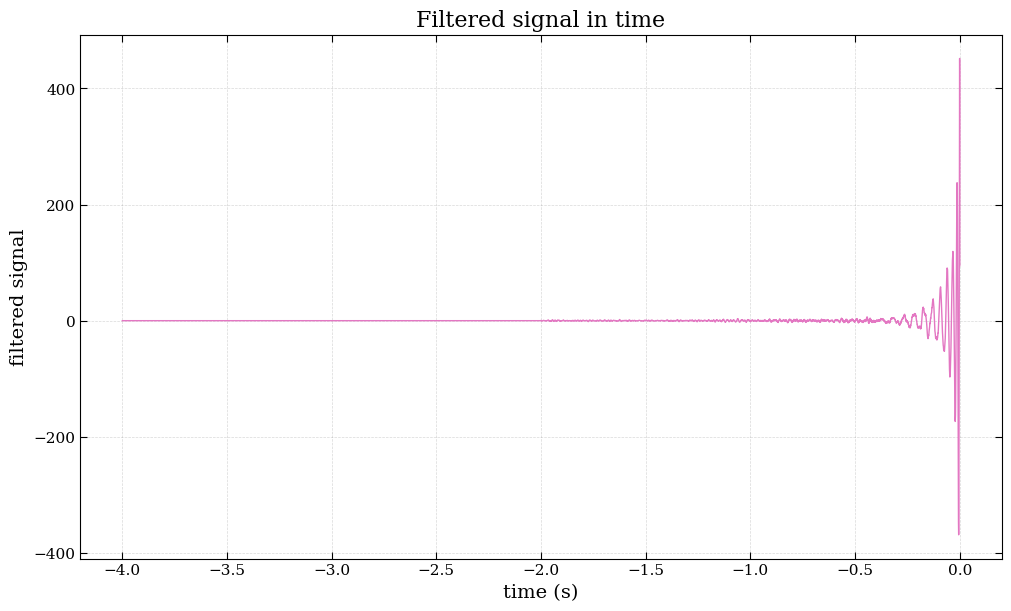

In [20]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t1, folded_whitened_signal, color='tab:pink', linewidth=1)

# labels
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_ylabel('filtered signal', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_title('Filtered signal in time', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=11)

# axis limits
# ax.set_xlim(-0.2, 0.1)
# ax.set_ylim(-10000, 10000)

plt.show()

### Filtered signal PSD

In [21]:
psd_ff, psd_fs = signal.periodogram(fil_sig_idft, fs=1/time_step, window='boxcar', 
                                    nfft=None, detrend=False, return_onesided=True, scaling='density')

/Users/giuliadoda/anaconda3/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:454: UserWarning: Input data is complex, switching to return_onesided=False
  freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,


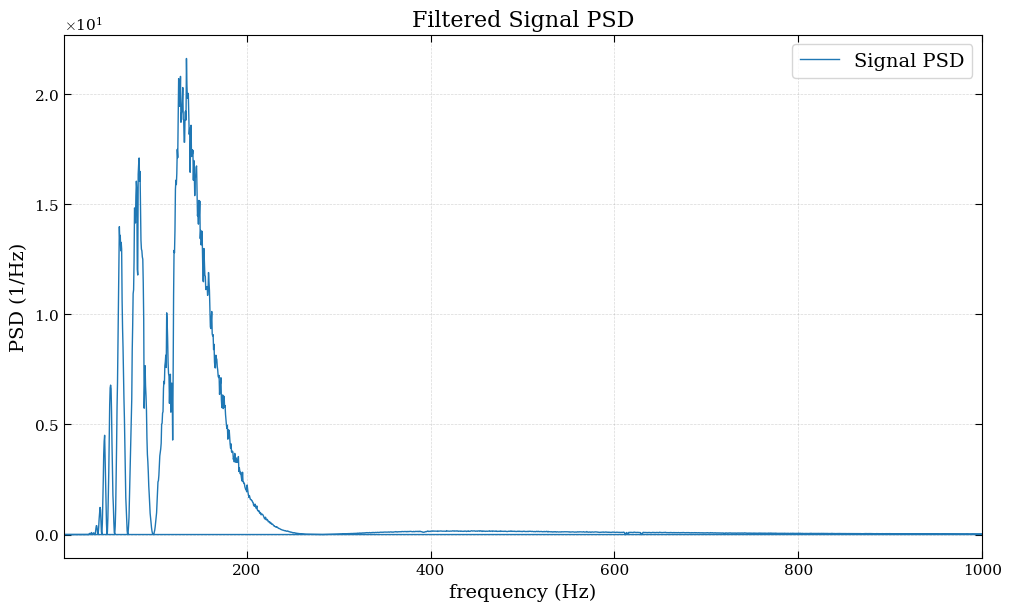

In [22]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(psd_ff, psd_fs, color='tab:blue', linewidth=1, label='Signal PSD')
# ax.set_xscale('log')

# labels
ax.set_xlabel('frequency (Hz)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_ylabel('PSD (1/Hz)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_title('Filtered Signal PSD', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=11)

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(11)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

ax.set_xlim(1, 1000)

# legend
ax.legend(prop={'size' : 14}, loc='best')

plt.show()